<a href="https://colab.research.google.com/github/Deepthi-glitch99/DeepthiProjects-ML-Mini-Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SSIM Score: 0.9292
🔍 Accuracy: 92.92%


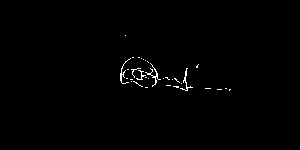

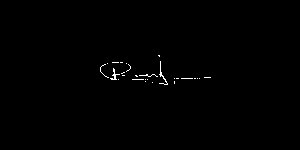

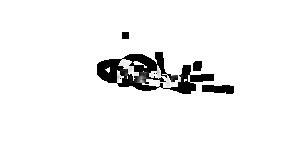

✅ Signatures MATCH


In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from google.colab.patches import cv2_imshow

def preprocess_signature(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not load image from path: {image_path}")
        return None

    img = cv2.resize(img, (300, 150))
    _, img_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    return img_thresh

def compare_signatures(sig1_path, sig2_path):
    sig1 = preprocess_signature(sig1_path)
    sig2 = preprocess_signature(sig2_path)

    if sig1 is None or sig2 is None:
        print("Comparison aborted due to image loading error.")
        return False

    # SSIM computation
    score, diff = ssim(sig1, sig2, full=True)

    # Accuracy print
    accuracy = score * 100
    print(f"SSIM Score: {score:.4f}")
    print(f"🔍 Accuracy: {accuracy:.2f}%")

    # Display images
    diff = (diff * 255).astype("uint8")
    cv2_imshow(sig1)
    cv2_imshow(sig2)
    cv2_imshow(diff)

    return score > 0.90

# Main block
if __name__ == "__main__":
    sig1_path = "/content/IMG_20250606_140322.png"
    sig2_path = "/content/IMG_20250606_140351.png"
    is_match = compare_signatures(sig1_path, sig2_path)

    if is_match:
        print("✅ Signatures MATCH")
    else:
        print("❌ Signatures DO NOT match")
